<a href="https://colab.research.google.com/github/dioumedeiros/fuzzy-logic/blob/master/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install networkx
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=8e93ab226b2c96f44c98393a916bd596c7cb5656b808137de10ef0591ef8f4e8
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema - automóvel
velocidade = ctrl.Antecedent(np.arange(0, 200, 1), 'velocidade')
temperatura = ctrl.Antecedent(np.arange(16, 30, 1), 'temperatura')
consumo = ctrl.Consequent(np.arange(5, 25, 1), 'consumo')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
consumo.automf(names=['pequeno', 'médio', 'grande'])


# Cria as funções de pertinência usando tipos variados
velocidade['baixa'] = fuzz.trapmf(velocidade.universe, [0, 0, 30, 60])
velocidade['média'] = fuzz.trapmf(velocidade.universe, [50, 70, 120, 150])
velocidade['alta'] = fuzz.trapmf(velocidade.universe, [110, 140, 200, 200])

temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [16, 16, 20, 25])
temperatura['alta'] = fuzz.trapmf(temperatura.universe,[20, 25, 30, 50])


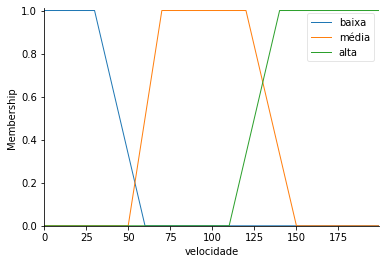

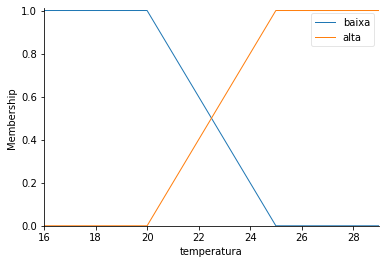

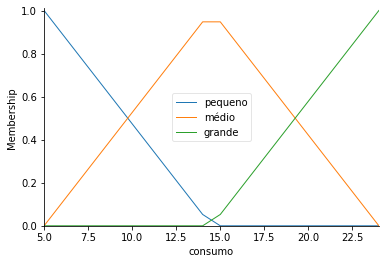

In [4]:
velocidade.view()
temperatura.view()
consumo.view()

In [0]:
rule1 = ctrl.Rule(velocidade['baixa'] & temperatura['baixa'], consumo['pequeno'])
rule2 = ctrl.Rule(velocidade['baixa'] & temperatura['alta'], consumo['pequeno'])
rule3 = ctrl.Rule(velocidade['média'] & temperatura['baixa'], consumo['grande'])
rule4 = ctrl.Rule(velocidade['média'] & temperatura['alta'], consumo['médio'])
rule5 = ctrl.Rule(velocidade['alta'] & temperatura['baixa'], consumo['grande'])
rule6 = ctrl.Rule(velocidade['alta'] & temperatura['alta'], consumo['grande'])

In [8]:
consumo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
consumo_simulator= ctrl.ControlSystemSimulation(consumo_ctrl)

#Entrada de valores de velocidade e temperatura
consumo_simulator.input['velocidade'] = 110
consumo_simulator.input['temperatura'] = 22

#Resultado computado
consumo_simulator.compute()
print(consumo_simulator.output['consumo'])

16.17150182161652


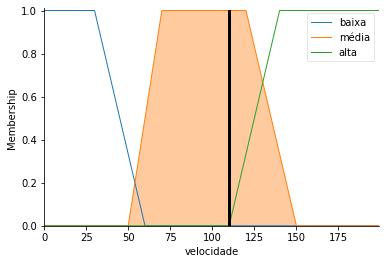

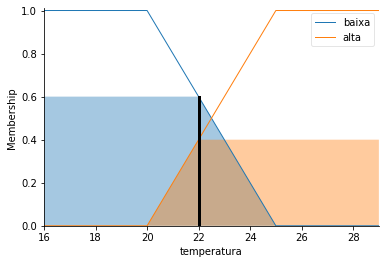

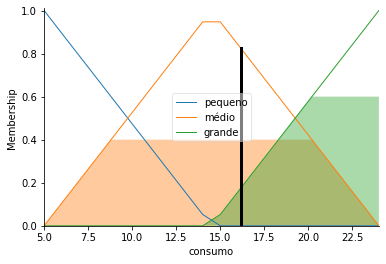

In [9]:
velocidade.view(sim=consumo_simulator)
temperatura.view(sim=consumo_simulator)
consumo.view(sim=consumo_simulator)